In [113]:
#importing the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [114]:
#loading the data set
df= pd.read_excel('flightprice_data.xlsx')
df.head()

,Unnamed: 0,Date,Airline,Source,Destination,Dep_time,Arr_time,Durtion,Route,stop,price
0,0,Feb 03,Vistara,Mumbai,Kolkata,12:25,16:50,04h 25m,BOM--->CCU,1-stop,"7,518"
1,1,Feb 03,GO FIRST,Mumbai,Kolkata,05:00,07:30,02h 30m,BOM--->CCU,non-stop,"7,412"
2,2,Feb 03,GO FIRST,Mumbai,Kolkata,21:00,23:35,02h 35m,BOM--->CCU,non-stop,NaN
3,3,Feb 03,Indigo,Mumbai,Kolkata,21:40,00:10,02h 30m,BOM--->CCU,non-stop,"7,412"
4,4,Feb 03,Indigo,Mumbai,Kolkata,23:00,01:30,02h 30m,BOM--->CCU,non-stop,NaN


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28786 entries, 0 to 28785
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   28786 non-null  int64 
 1   Date         28786 non-null  object
 2   Airline      28786 non-null  object
 3   Source       28786 non-null  object
 4   Destination  28786 non-null  object
 5   Dep_time     28786 non-null  object
 6   Arr_time     28786 non-null  object
 7   Durtion      28786 non-null  object
 8   Route        28786 non-null  object
 9   stop         28786 non-null  object
 10  price        17141 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.4+ MB


In [116]:
df=df.dropna()

In [117]:
df

,Unnamed: 0,Date,Airline,Source,Destination,Dep_time,Arr_time,Durtion,Route,stop,price
0,0,Feb 03,Vistara,Mumbai,Kolkata,12:25,16:50,04h 25m,BOM--->CCU,1-stop,"7,518"
1,1,Feb 03,GO FIRST,Mumbai,Kolkata,05:00,07:30,02h 30m,BOM--->CCU,non-stop,"7,412"
3,3,Feb 03,Indigo,Mumbai,Kolkata,21:40,00:10,02h 30m,BOM--->CCU,non-stop,"7,412"
5,5,Feb 03,GO FIRST,Mumbai,Kolkata,05:00,09:05,04h 05m,BOM--->HYD,1-stop,"7,413"
7,7,Feb 03,GO FIRST,Mumbai,Kolkata,05:00,12:30,07h 30m,BOM--->HYD,1-stop,"7,413"
...,...,...,...,...,...,...,...,...,...,...,...
28776,28776,Mar 02,SpiceJet,Bangalore,Delhi,06:20,15:00,08h 40m,BLR--->UDR,1-stop,"6,022"
28778,28778,Mar 02,AirAsia,Bangalore,Delhi,05:10,14:55,09h 45m,BLR--->IXB,1-stop,"6,072"
28780,28780,Mar 02,AirAsia,Bangalore,Delhi,11:45,19:20,07h 35m,BLR--->IXB,1-stop,"6,072"
28782,28782,Mar 02,SpiceJet,Bangalore,Delhi,05:45,17:45,12h 00m,BLR--->GOI,1-stop,"6,118"


In [118]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [119]:
df

,Date,Airline,Source,Destination,Dep_time,Arr_time,Durtion,Route,stop,price
0,Feb 03,Vistara,Mumbai,Kolkata,12:25,16:50,04h 25m,BOM--->CCU,1-stop,"7,518"
1,Feb 03,GO FIRST,Mumbai,Kolkata,05:00,07:30,02h 30m,BOM--->CCU,non-stop,"7,412"
3,Feb 03,Indigo,Mumbai,Kolkata,21:40,00:10,02h 30m,BOM--->CCU,non-stop,"7,412"
5,Feb 03,GO FIRST,Mumbai,Kolkata,05:00,09:05,04h 05m,BOM--->HYD,1-stop,"7,413"
7,Feb 03,GO FIRST,Mumbai,Kolkata,05:00,12:30,07h 30m,BOM--->HYD,1-stop,"7,413"
...,...,...,...,...,...,...,...,...,...,...
28776,Mar 02,SpiceJet,Bangalore,Delhi,06:20,15:00,08h 40m,BLR--->UDR,1-stop,"6,022"
28778,Mar 02,AirAsia,Bangalore,Delhi,05:10,14:55,09h 45m,BLR--->IXB,1-stop,"6,072"
28780,Mar 02,AirAsia,Bangalore,Delhi,11:45,19:20,07h 35m,BLR--->IXB,1-stop,"6,072"
28782,Mar 02,SpiceJet,Bangalore,Delhi,05:45,17:45,12h 00m,BLR--->GOI,1-stop,"6,118"


In [120]:
df.isnull().sum()

Date           0
Airline        0
Source         0
Destination    0
Dep_time       0
Arr_time       0
Durtion        0
Route          0
stop           0
price          0
dtype: int64

In [121]:
#converting the objects to hours,minutes
df["Dep_hour"] = pd.to_datetime(df["Dep_time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_time"]).dt.minute
df.drop(["Dep_time"], axis = 1, inplace = True)

In [122]:
#converting the objects to hours, minutes
df["Arr_hour"] = pd.to_datetime(df["Arr_time"]).dt.hour
df["Arr_min"] = pd.to_datetime(df["Arr_time"]).dt.minute
df.drop(["Arr_time"], axis = 1, inplace = True)

In [123]:
df.head()

,Date,Airline,Source,Destination,Durtion,Route,stop,price,Dep_hour,Dep_min,Arr_hour,Arr_min
0,Feb 03,Vistara,Mumbai,Kolkata,04h 25m,BOM--->CCU,1-stop,"7,518",12,25,16,50
1,Feb 03,GO FIRST,Mumbai,Kolkata,02h 30m,BOM--->CCU,non-stop,"7,412",5,0,7,30
3,Feb 03,Indigo,Mumbai,Kolkata,02h 30m,BOM--->CCU,non-stop,"7,412",21,40,0,10
5,Feb 03,GO FIRST,Mumbai,Kolkata,04h 05m,BOM--->HYD,1-stop,"7,413",5,0,9,5
7,Feb 03,GO FIRST,Mumbai,Kolkata,07h 30m,BOM--->HYD,1-stop,"7,413",5,0,12,30


In [124]:
#replace the h,m from the duration 
df['Durtion']=df['Durtion'].str.replace("h",':')
df['Durtion']=df['Durtion'].str.replace("m",'')
df['Durtion']=df['Durtion'].str.replace(" ",'')

#spliting the hours and minutes 
df["Dur_hour"]=df['Durtion'].str.split(':').str[0]
df["Dur_min"]=df['Durtion'].str.split(':').str[1]
df.drop(["Durtion"], axis = 1, inplace = True)

In [125]:
#removing the comma symbole form price
df['price']=df['price'].str.replace(",","")

In [126]:
df['Month']=df['Date'].str.split(" ").str[0]
df['day']=df['Date'].str.split(" ").str[1]

In [127]:
df.head()

,Date,Airline,Source,Destination,Route,stop,price,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min,Month,day
0,Feb 03,Vistara,Mumbai,Kolkata,BOM--->CCU,1-stop,7518,12,25,16,50,04,25,Feb,03
1,Feb 03,GO FIRST,Mumbai,Kolkata,BOM--->CCU,non-stop,7412,5,0,7,30,02,30,Feb,03
3,Feb 03,Indigo,Mumbai,Kolkata,BOM--->CCU,non-stop,7412,21,40,0,10,02,30,Feb,03
5,Feb 03,GO FIRST,Mumbai,Kolkata,BOM--->HYD,1-stop,7413,5,0,9,5,04,05,Feb,03
7,Feb 03,GO FIRST,Mumbai,Kolkata,BOM--->HYD,1-stop,7413,5,0,12,30,07,30,Feb,03


In [128]:
df.drop(["Date"], axis = 1, inplace = True)

In [129]:
column=['Airline', 'Source', 'Destination', 'day', 'Month','Route','Dep_hour','Dep_min', 'Dur_hour','Dur_min','Arr_hour','Arr_min','stop','price']
  
# create the new index for columns
df=df.reindex(column, axis='columns')

In [130]:
df.head()

,Airline,Source,Destination,day,Month,Route,Dep_hour,Dep_min,Dur_hour,Dur_min,Arr_hour,Arr_min,stop,price
0,Vistara,Mumbai,Kolkata,03,Feb,BOM--->CCU,12,25,04,25,16,50,1-stop,7518
1,GO FIRST,Mumbai,Kolkata,03,Feb,BOM--->CCU,5,0,02,30,7,30,non-stop,7412
3,Indigo,Mumbai,Kolkata,03,Feb,BOM--->CCU,21,40,02,30,0,10,non-stop,7412
5,GO FIRST,Mumbai,Kolkata,03,Feb,BOM--->HYD,5,0,04,05,9,5,1-stop,7413
7,GO FIRST,Mumbai,Kolkata,03,Feb,BOM--->HYD,5,0,07,30,12,30,1-stop,7413


In [131]:
df["day"] = pd.to_datetime(df.day, format="%d").dt.day
df['Month'] =df['Month'].str.replace('Feb','2')
df['Month'] =df['Month'].str.replace('Mar','3')
df["Month"] = pd.to_datetime(df["Month"], format = "%m").dt.month

In [132]:
#converting object to numeric data type 
df["Dep_hour"]=pd.to_numeric(df["Dep_hour"])
df["Dur_min"]=pd.to_numeric(df["Dur_min"])
df['price']=pd.to_numeric(df['price'])

In [133]:
df.head()

,Airline,Source,Destination,day,Month,Route,Dep_hour,Dep_min,Dur_hour,Dur_min,Arr_hour,Arr_min,stop,price
0,Vistara,Mumbai,Kolkata,3,2,BOM--->CCU,12,25,04,25,16,50,1-stop,7518
1,GO FIRST,Mumbai,Kolkata,3,2,BOM--->CCU,5,0,02,30,7,30,non-stop,7412
3,Indigo,Mumbai,Kolkata,3,2,BOM--->CCU,21,40,02,30,0,10,non-stop,7412
5,GO FIRST,Mumbai,Kolkata,3,2,BOM--->HYD,5,0,04,5,9,5,1-stop,7413
7,GO FIRST,Mumbai,Kolkata,3,2,BOM--->HYD,5,0,07,30,12,30,1-stop,7413


Vistara      5182
Air India    3705
GO FIRST     2827
Indigo       2705
AirAsia      1535
SpiceJet     1187
Name: Airline, dtype: int64


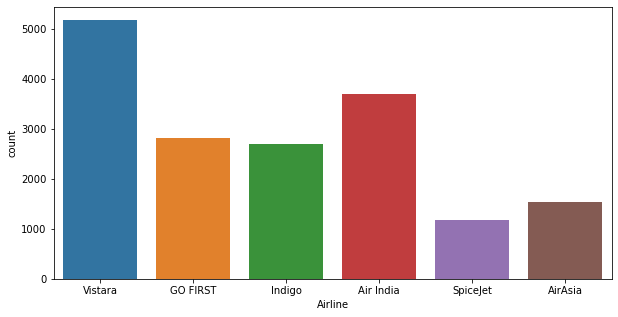

In [134]:
fig=plt.figure(figsize=(10,5))
sns.countplot(df['Airline'])
print(df['Airline'].value_counts())
plt.show()

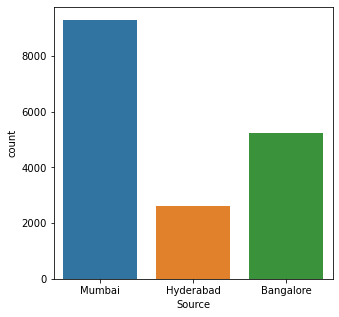

In [135]:
fig=plt.figure(figsize=(5,5))
sns.countplot(df['Source'])
plt.show()

Delhi      10396
Kolkata     6745
Name: Destination, dtype: int64


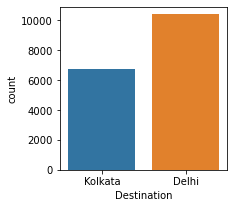

In [136]:
fig=plt.figure(figsize=(3,3))
sns.countplot(df['Destination'])
print(df['Destination'].value_counts())
plt.show()

27    712
20    706
21    696
28    695
22    687
1     685
17    676
25    676
18    674
24    673
23    669
16    666
15    654
14    642
19    636
26    636
13    623
2     612
4     599
11    591
12    554
7     520
6     514
10    505
8     501
9     499
5     436
3     404
Name: day, dtype: int64


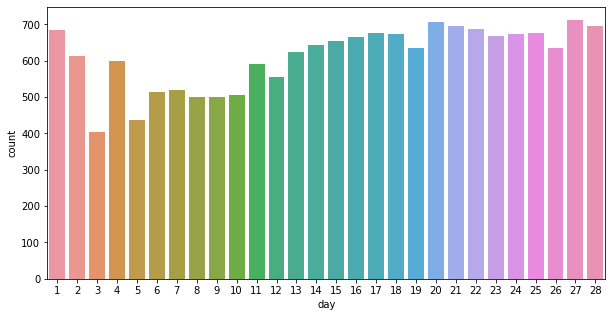

In [137]:
#number of flights from bangalore to delhi
fig=plt.figure(figsize=(10,5))
sns.countplot(df['day'])
print(df['day'].value_counts())
plt.show()

2    15415
3     1726
Name: Month, dtype: int64


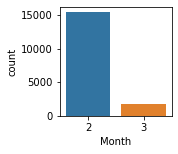

In [138]:
fig=plt.figure(figsize=(2,2))
sns.countplot(df['Month'])
print(df['Month'].value_counts())
plt.show()

1-stop      13779
non-stop     2684
2+-stop       678
Name: stop, dtype: int64


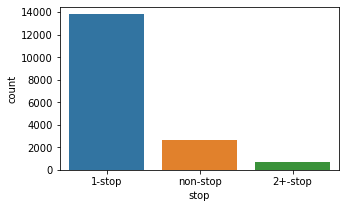

In [139]:
fig=plt.figure(figsize=(5,3))
sns.countplot(df['stop'])
print(df['stop'].value_counts())
plt.show()

In [140]:
a=df.describe(include=['O']).columns

In [141]:
Airline = pd.get_dummies(df['Airline'])
Airline.head()

,Air India,AirAsia,GO FIRST,Indigo,SpiceJet,Vistara
0,0,0,0,0,0,1
1,0,0,1,0,0,0
3,0,0,0,1,0,0
5,0,0,1,0,0,0
7,0,0,1,0,0,0


In [142]:
Source = pd.get_dummies(df["Source"])
Source.head()

,Bangalore,Hyderabad,Mumbai
0,0,0,1
1,0,0,1
3,0,0,1
5,0,0,1
7,0,0,1


In [143]:
Destination = pd.get_dummies(df["Destination"])
Destination.head()

,Delhi,Kolkata
0,0,1
1,0,1
3,0,1
5,0,1
7,0,1


In [145]:
# Replacing Stops
df.replace({"non-stop": 0, "1-stop": 1, "2+-stop": 2}, inplace = True)
df['stop']=pd.to_numeric(df['stop'])

In [147]:
 #Concatenate dataframe --> df + Airline + Source + Destination
df = pd.concat([df, Airline, Source, Destination], axis = 1)

df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [148]:
df.head()

,day,Month,Route,Dep_hour,Dep_min,Dur_hour,Dur_min,Arr_hour,Arr_min,stop,...,AirAsia,GO FIRST,Indigo,SpiceJet,Vistara,Bangalore,Hyderabad,Mumbai,Delhi,Kolkata
0,3,2,BOM--->CCU,12,25,04,25,16,50,1,...,0,0,0,0,1,0,0,1,0,1
1,3,2,BOM--->CCU,5,0,02,30,7,30,0,...,0,1,0,0,0,0,0,1,0,1
3,3,2,BOM--->CCU,21,40,02,30,0,10,0,...,0,0,1,0,0,0,0,1,0,1
5,3,2,BOM--->HYD,5,0,04,5,9,5,1,...,0,1,0,0,0,0,0,1,0,1
7,3,2,BOM--->HYD,5,0,07,30,12,30,1,...,0,1,0,0,0,0,0,1,0,1


<AxesSubplot:>

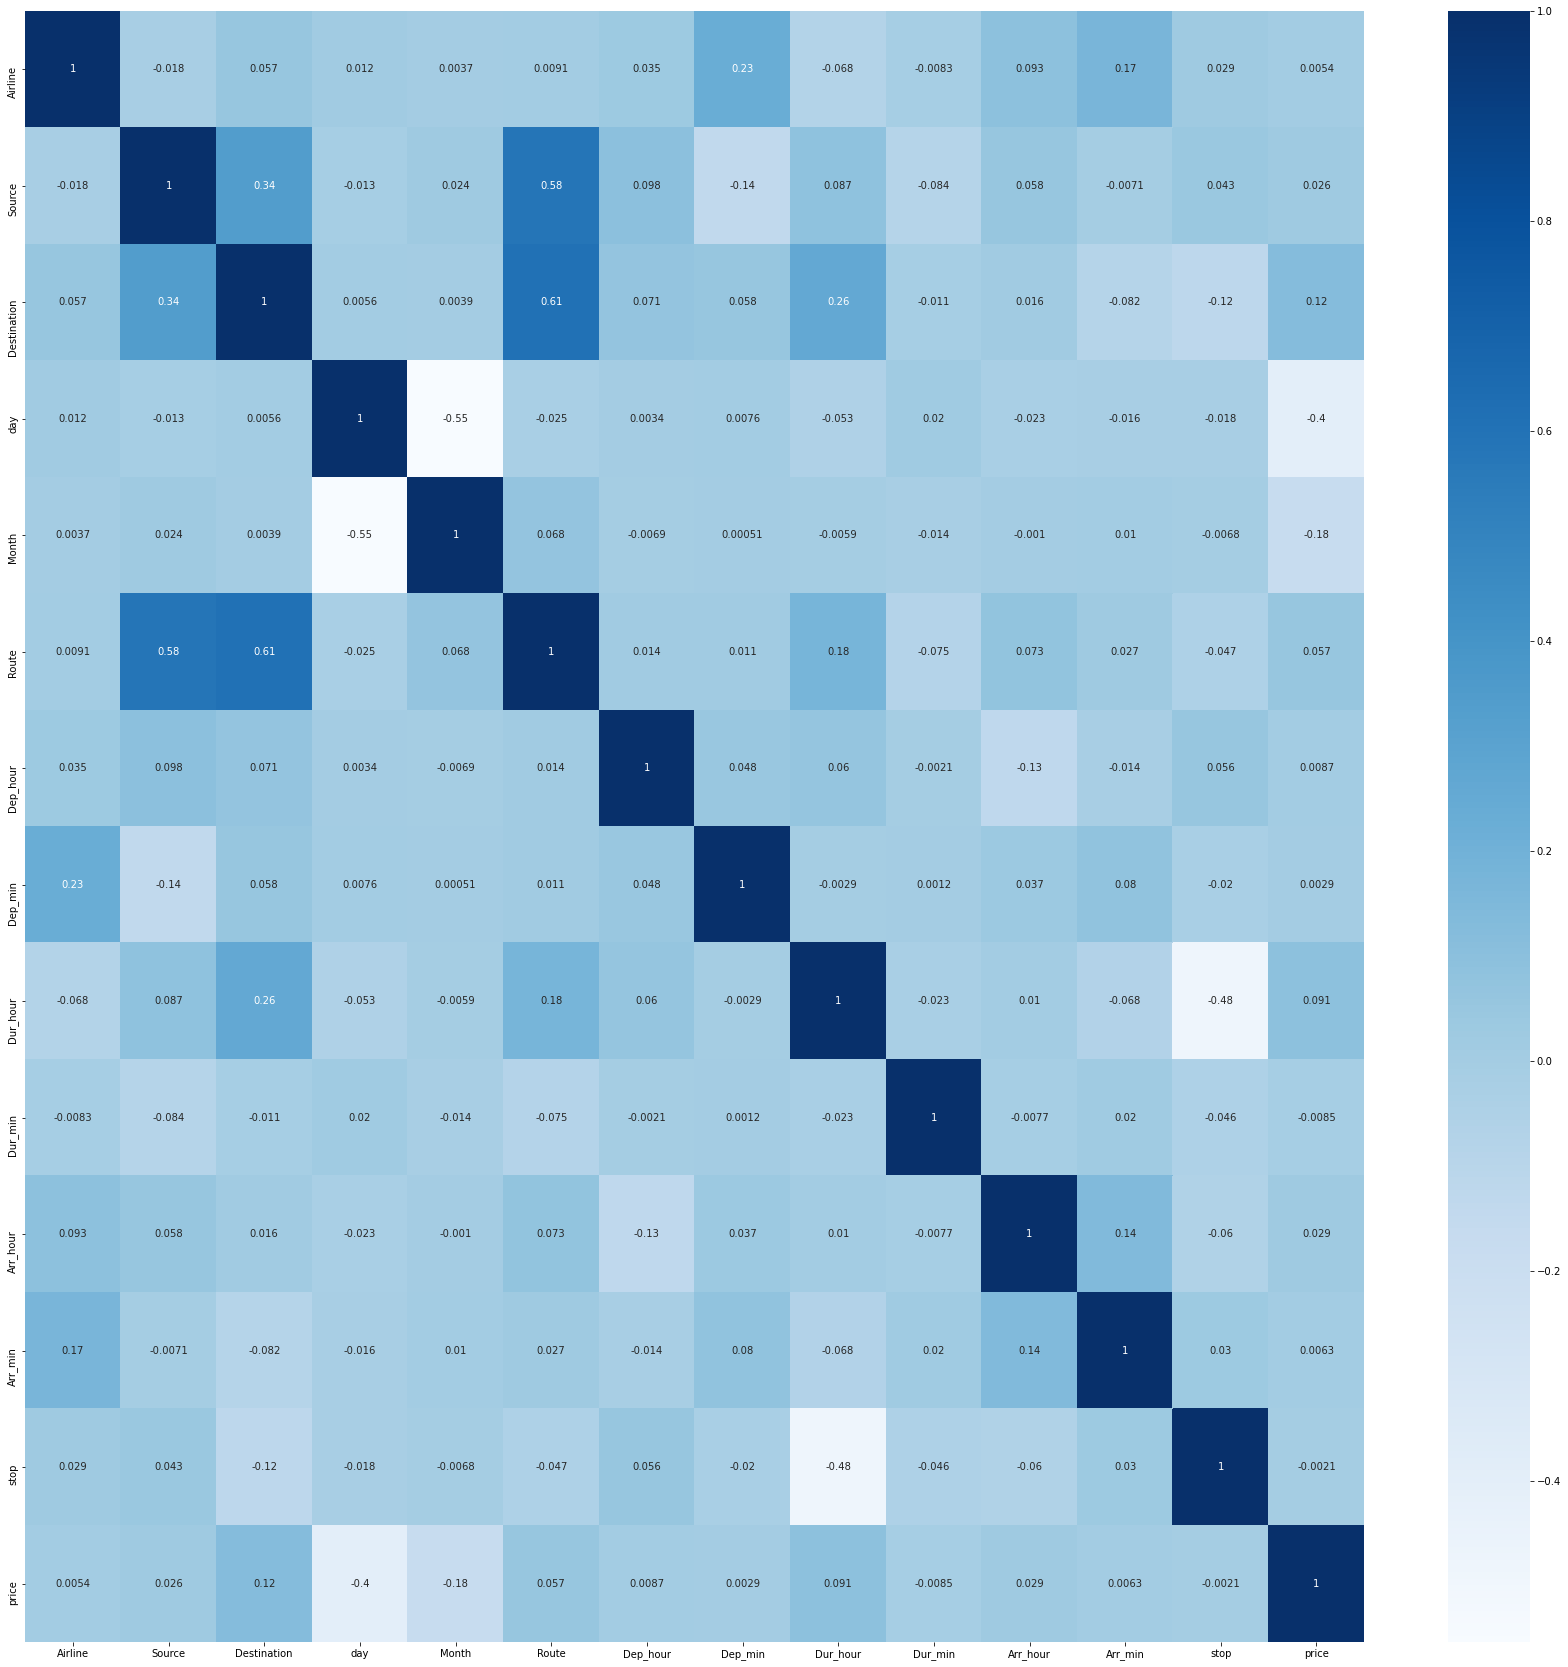

In [98]:

df_correlation=df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(df_correlation,cmap='Blues',annot=True)

Airline           AxesSubplot(0.125,0.816017;0.168478x0.0639831)
Source         AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
Destination    AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
day            AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
Month             AxesSubplot(0.125,0.739237;0.168478x0.0639831)
Route          AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
Dep_hour       AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
Dep_min        AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
Dur_hour          AxesSubplot(0.125,0.662458;0.168478x0.0639831)
Dur_min        AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
Arr_hour       AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
Arr_min        AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
stop              AxesSubplot(0.125,0.585678;0.168478x0.0639831)
price          AxesSubplot(0.327174,0.585678;0.168478x0.0639831)
dtype: object

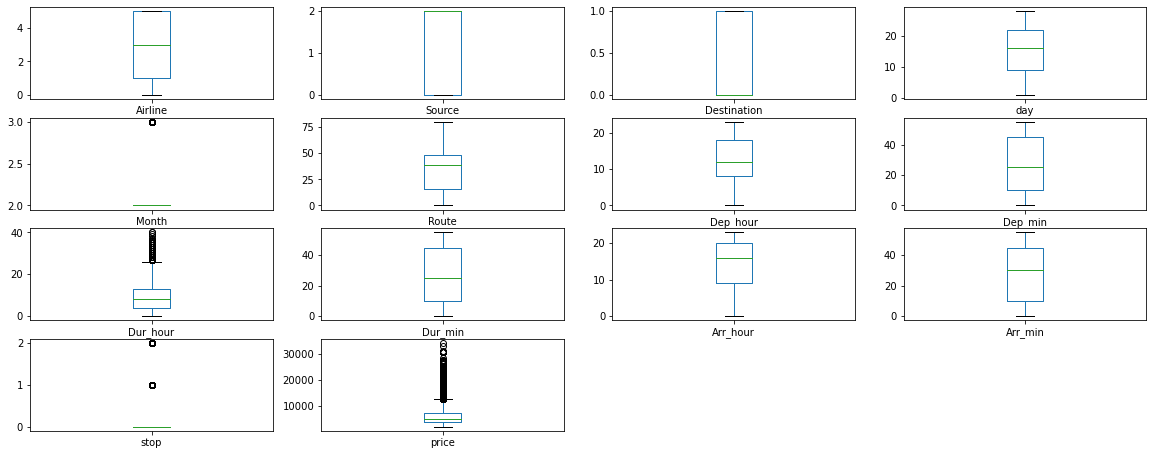

In [99]:
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(20,20))

In [149]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [101]:
df_new=df[(z<3).all(axis=1)]
df_new.head()
df_new.shape

(16859, 14)

In [102]:
df.shape

(17141, 14)

In [103]:
Data_loss=((17141-16859)/16859)*100
Data_loss

1.6726970757458923

In [104]:
df_new.skew()

Airline       -0.103980
Source        -0.474967
Destination    0.458515
day           -0.192839
Month          2.623538
Route          0.029673
Dep_hour       0.211256
Dep_min        0.016842
Dur_hour       0.849859
Dur_min        0.031048
Arr_hour      -0.647553
Arr_min       -0.112843
stop           1.695896
price          1.243170
dtype: float64

In [154]:
df.drop('Route',axis=1,inplace=True)

In [155]:
x=df.drop('price',axis=1)
y=df['price']
print(x.shape)
print(y.shape)

(17141, 20)
(17141,)


In [163]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [157]:
def chosen_model(model):
    maxAccu=0
    maxRS=0
    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
        lm=model()
        lm.fit(x_train,y_train)
        pred=lm.predict(x_test)
        accu=r2_score(y_test,pred)
        if accu>maxAccu:
            maxAccu=accu
            maxRS=i
    print("best accuracy is",maxAccu,"on random state",maxRS)

In [164]:
chosen_model(RandomForestRegressor)

best accuracy is 0.3959537301540189 on random state 163


In [159]:
chosen_model(DecisionTreeRegressor)

best accuracy is 0.010869260636905964 on random state 124


In [160]:
chosen_model(AdaBoostRegressor)

best accuracy is 0.49634936513838646 on random state 114


In [161]:
chosen_model(GradientBoostingRegressor)

best accuracy is 0.5367323093557685 on random state 181


In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=181)
from sklearn.model_selection import cross_val_score
score=cross_val_score(GradientBoostingRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[ 0.46035985  0.39482096  0.33679244  0.44592295 -0.01921104  0.58337251
 -0.00667658]
0.31362586984402924
0.21787939915115598


In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=163)
from sklearn.model_selection import cross_val_score
score=cross_val_score(RandomForestRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[-0.45056899  0.32262345  0.13481898  0.30191473  0.26307353  0.43195817
 -0.1127513 ]
0.12729551204967365
0.28573372647274486


In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=114)
from sklearn.model_selection import cross_val_score
score=cross_val_score(AdaBoostRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[ 0.42227384  0.2172107   0.37354838  0.40636832  0.37884058  0.46081689
 -0.05419744]
0.3149801796975954
0.16668680583099127


In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=124)
from sklearn.model_selection import cross_val_score
score=cross_val_score(DecisionTreeRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[-2.73788282  0.05610369 -0.10234989 -0.06936708 -0.02469894 -0.02398016
 -1.45453366]
-0.6223869792844449
0.9942500148488179


In [171]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [176]:
parameter={'n_estimators':[100,200,500,1000],
          'min_samples_split':[5,6,7,8,9],
          'max_depth':[5,6,7,8],
          'min_samples_leaf':[2,4,7,9]}

In [177]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [178]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [2, 4, 7, 9],
                         'min_samples_split': [5, 6, 7, 8, 9],
                         'n_estimators': [100, 200, 500, 1000]})

In [179]:
GCV.best_params_

{'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 100}

In [180]:
flightprice_mod=GradientBoostingRegressor(n_estimators=100,max_depth=5,min_samples_leaf=7,min_samples_split=6)
flightprice_mod.fit(x_train,y_train)
pred=flightprice_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

51.80447068362191


In [181]:
import joblib
joblib.dump(flightprice_mod,"ease_my_trip_flightpricemodel.pkl")

['ease_my_trip_flightpricemodel.pkl']